 
# 		ALL SCATTER PLOTS FROM PRESENTATION


## Load all Data with these first cells
### DATA: Read gene expression data from samples used in Winter Quarter 2018
- Tertiary Output CKCC cohort
- treehouse-8.0.1_comp-v5
- takes a long time

In [5]:
options(stringsAsFactors=FALSE) # for compatibile code between us
library(tidyverse)

Loading tidyverse: ggplot2
Loading tidyverse: tibble
Loading tidyverse: tidyr
Loading tidyverse: readr
Loading tidyverse: purrr
Loading tidyverse: dplyr
Conflicts with tidy packages ---------------------------------------------------
filter(): dplyr, stats
lag():    dplyr, stats


In [81]:
setwd("/data/archive/downstream/")
samples146file <- read_csv("~/work/Treehouse_OutlierRNASeq/CKCC1_146Samples.csv", )
samples146 <- as.character(as.vector(samples146file[,]))
locationList <- c()
tables<-c()
a <- tibble()
for (sampleName in samples146){
    setwd(paste0("/data/archive/downstream/",sampleName,"/tertiary/treehouse-8.0.1_comp-v5/"))
    location <- paste0(getwd(),"/outlier_results_",sampleName)
    cur<-read_tsv(location, col_types=cols()) 
    cur$sampleID<- rep(sampleName,length(cur$Gene))
    cur <- cur %>% select(Gene, sample, sampleID)
    a <- rbind(a,cur)
}

Parsed with column specification:
cols(
  .default = col_character()
)
See spec(...) for full column specifications.


### DATA: Read RSEM (Expected Count) data from samples used in Winter Quarter 2018
- Secondary Output CKCC cohort
- ucsc_cgl-rnaseq-cgl-pipeline-0.0.0-0000000/RSEM
- takes a long time

In [ ]:

# /data/archive/downstream/TH01_0123_S01/secondary/ucsc_cgl-rnaseq-cgl-pipeline-0.0.0-0000000/RSEM/rsem_genes.results


setwd("/data/archive/downstream/")

locationList <- c()

tables<-c()
b <- tibble()
for (sampleName in samples146){
    setwd(paste0("/data/archive/downstream/",sampleName,"/secondary/ucsc_cgl-rnaseq-cgl-pipeline-0.0.0-0000000/RSEM/"))
    location <- paste0(getwd(),"/rsem_genes.results")
    cur<-read_tsv(location, col_types=cols()) 
    cur$sampleID<- rep(sampleName,length(cur$gene_id))
    cur <- cur %>% select(gene_id, expected_count, TPM, sampleID)
    b <- rbind(b,cur)
}



### DATA: UMEND Read data from samples used in Winter Quarter 2018
- Self uploaded data file from Holly originally

In [ ]:
setwd("/home/jovyan/work/Treehouse_OutlierRNASeq/")

umend_file = list.files(, "ckccSampleUMEND_reads")

umendResults <- read_tsv(umend_file, col_types = cols()) %>% arrange(th_sampleid)
head(umendResults)

### DATA: Name data for back-compatibility

In [ ]:
rsemResults <- b
outlierResults <- a
head(b)
head(a)

# Number of Expressed Genes vs. p95 Plot


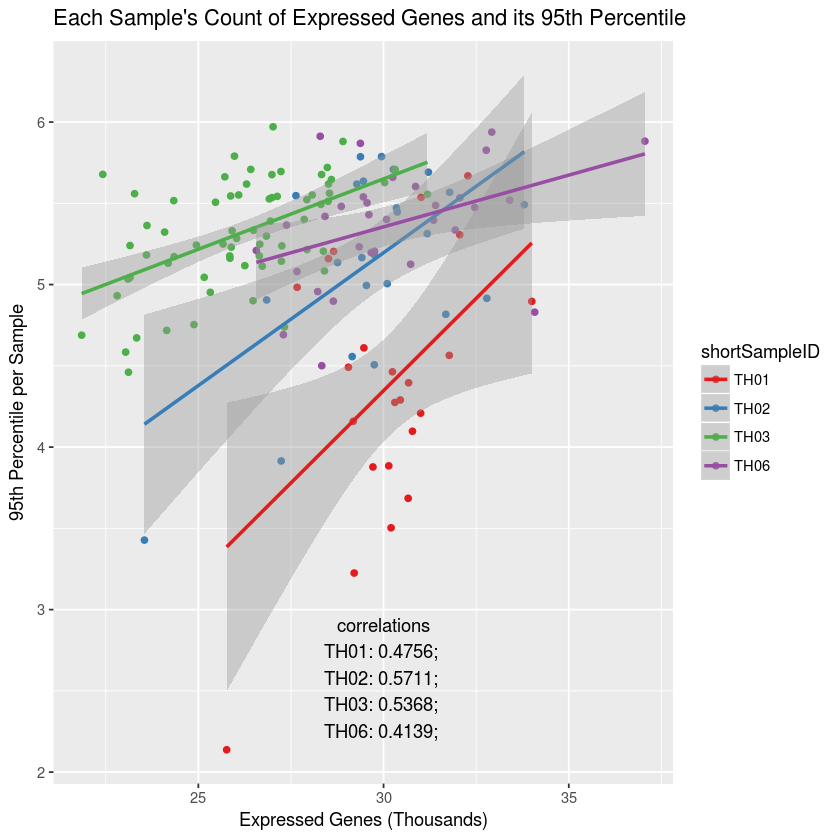

In [18]:
dfNotZerosOrNotZeros <- outlierResults %>%
  select(sampleID, sample) %>%
  group_by(sampleID) %>%
  count(sample == 0) 

dfNotZeros <- dfNotZerosOrNotZeros %>%
  group_by(sampleID) %>%
  filter(`sample == 0` == F)

p95df <- outlierResults %>% group_by(sampleID) %>% summarize(p95 = quantile(sample, 0.95))

dfNotZeros$p95 = p95df$p95

dfNotZeros$TH01 = grepl("TH01", p95df$sampleID)

dfTH01s <- dfNotZeros %>% filter(TH01 == T)
dfNotTH01s <- dfNotZeros %>% filter(TH01 == F)

dfNotZeros$TH01 <- gsub("TRUE", "RiboMinus",dfNotZeros$TH01)
dfNotZeros$TH01 <- gsub("FALSE", "PolyA",dfNotZeros$TH01)


dfScatter <- dfNotZeros 
colnames(dfScatter)[which(names(dfScatter) == "TH01")] <- "Sample_Name"


dfScatter$shortSampleID <- gsub('[_][0-9S]+','',dfScatter$sampleID)
i<-1
corlist<-list(0)
for(sampleCenter in dfScatter$shortSampleID){
	dfab <- dfScatter %>% filter(shortSampleID == sampleCenter)
	corlist[[i]] <- round(cor(dfab$n, dfab$p95),4)
	i <- i+ 1
}

correlations<-data.frame(sampleID = unique(dfScatter$shortSampleID))
correlations$cor <- unique(corlist)

for (i in seq(1,4)){
	paste0()
}


resultsCorrelations <- paste((paste0(correlations$sampleID, ": ", correlations$cor, "; \n")), collapse = '')
ggplot(dfScatter,aes(n/1000,p95, color = shortSampleID)) + 
  scale_colour_brewer(palette = "Set1")+
  scale_fill_brewer(palette = "Set1")+
  geom_point() +
  scale_size_continuous(range = c(1,6))+
  geom_smooth(method = 'lm')+
  annotate(
    "text",
    x = 30,
    y = 2.5 ,
    label = paste0("correlations\n",resultsCorrelations)
    )+
  xlab('Expressed Genes (Thousands)') + ylab('95th Percentile per Sample') +
  ggtitle('Each Sample\'s Count of Expressed Genes and its 95th Percentile') 




# UMEND count vs p95 Plot

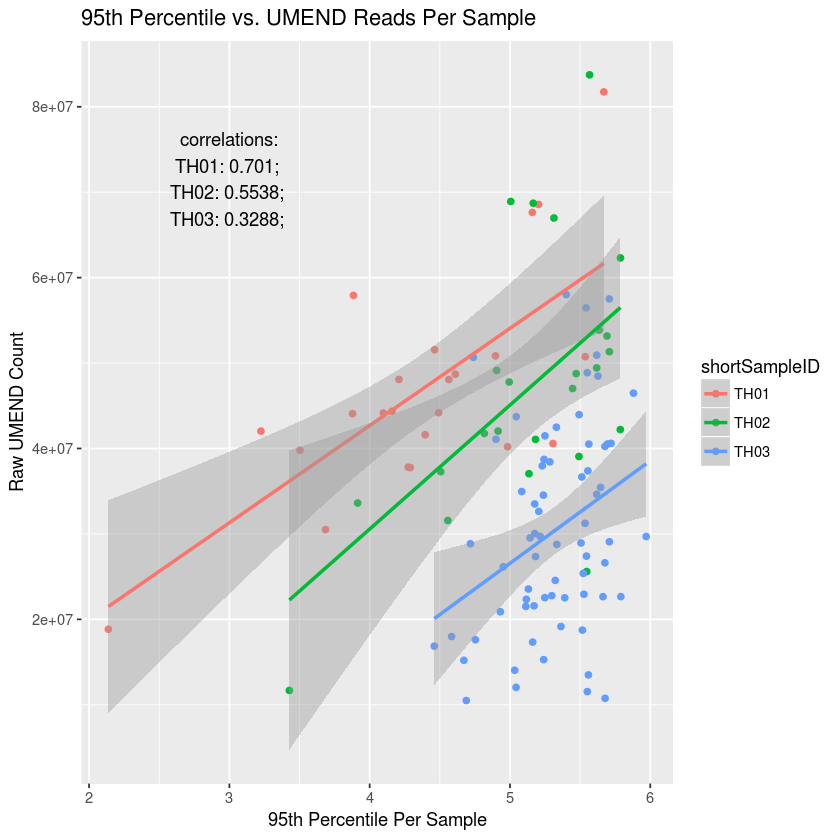

In [62]:

UMENDp95DF <- outlierResults %>%
  group_by(sampleID) %>%
  summarise(p95 = quantile(sample, c(0.95))) %>%
  arrange(sampleID) %>%
  filter(sampleID %in% umendResults$th_sampleid) %>%
  add_column(rawUMEND = umendResults$umendCountRaw, umendID = umendResults$th_sampleid)



UMENDp95DF$Sample = grepl("TH01", UMENDp95DF$sampleID)

UMENDp95DFTH01 <- UMENDp95DF %>% filter(Sample == T)
UMENDp95DFOther <- UMENDp95DF %>% filter(Sample == F)

UMENDp95DF$Sample <- gsub("TRUE", "TH01_[Ribo]...",UMENDp95DF$Sample)
UMENDp95DF$Sample <- gsub("FALSE", "Not TH01_[PolyA]...",UMENDp95DF$Sample)

UMENDp95DF$shortSampleID <- gsub('[_][0-9S]+','',UMENDp95DF$sampleID)
i<-1
corlist<-list(0)
for(sampleCenter in UMENDp95DF$shortSampleID){
  dfab <- UMENDp95DF %>% filter(shortSampleID == sampleCenter)
  corlist[[i]] <- round(cor(dfab$rawUMEND, dfab$p95),4)
  i <- i+ 1
}

correlations<-data.frame(sampleID = unique(UMENDp95DF$shortSampleID))
correlations$cor <- unique(corlist)
resultsCorrelations <- paste((paste0(correlations$sampleID, ": ", correlations$cor, "; \n")), collapse = '')


ggplot(UMENDp95DF, aes(p95, rawUMEND, color = shortSampleID)) + geom_point() +
  ylab("Raw UMEND Count") + xlab("95th Percentile Per Sample") + 
  geom_smooth(method = 'lm') +
  ggtitle("95th Percentile vs. UMEND Reads Per Sample") + 
  annotate(
    "text",
    x = 3,
    y = 7e+07,
    label = paste0("correlations:\n", resultsCorrelations)
      
    )







# TPM vs. p95

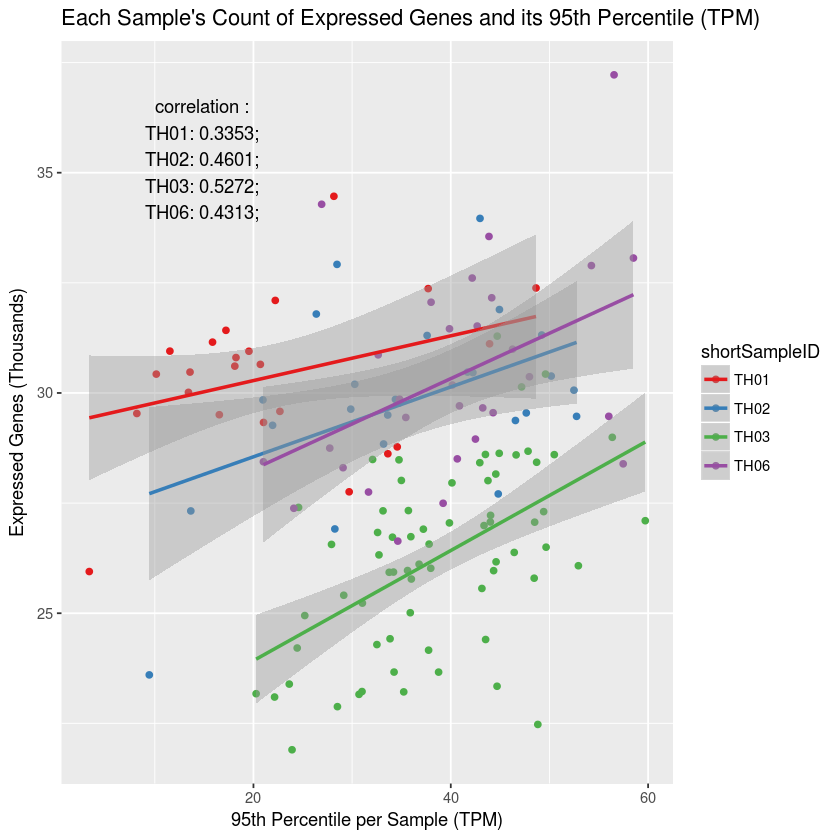

In [69]:

dfScatter$shortSampleID <- gsub('.results','',dfScatter$sampleID)

dfScatter$shortSampleID <- gsub('[_][0-9S]+','',dfScatter$shortSampleID)
dfScatter$Method <- gsub('[TH02-9]+[^TH01]', 'PolyA', dfScatter$shortSampleID)
dfScatter$Method <- gsub('TH01', 'RiboD', dfScatter$Method)
i<-1
corlist<-list(0)
for(sampleCenter in dfScatter$shortSampleID){
  dfab <- dfScatter %>% filter(shortSampleID == sampleCenter)
  corlist[[i]] <- round(cor(dfab$n, dfab$p95),4)
  i <- i+ 1
}

correlations<-data.frame(sampleID = unique(dfScatter$shortSampleID))
correlations$cor <- unique(corlist)
resultsCorrelations <- paste((paste0(correlations$sampleID, ": ", correlations$cor, "; \n")), collapse = '')

i<-1
corlistM<-list(0)
for(method in unique(dfScatter$Method)){
  dfab <- dfScatter %>% filter(Method == method)
  corlistM[[i]] <- round(cor(dfab$n, dfab$p95),4)
  i <- i+ 1
}

correlationsM<-data.frame(method = unique(dfScatter$Method))
correlationsM$corMethod <- corlistM
resultsCorrelationsM <- paste((paste0(correlationsM$method, ": ", correlationsM$corMethod, "; \n")), collapse = '')


ggplot(dfScatter, aes(p95, zeroCount/1000, color=shortSampleID)) + 
	scale_colour_brewer(type = "seq", palette = "Set1", direction = 1)+
	scale_fill_brewer(type = "seq", palette = "Set1", direction = 1)+
	geom_point() +
	ylab('Expressed Genes (Thousands)') + xlab('95th Percentile per Sample (TPM)') +
	ggtitle('Each Sample\'s Count of Expressed Genes and its 95th Percentile (TPM)') +
	geom_smooth(method = 'lm')+
	annotate("text",x = 15,y = 35 ,label = paste0(	"correlation : \n",	resultsCorrelations	))


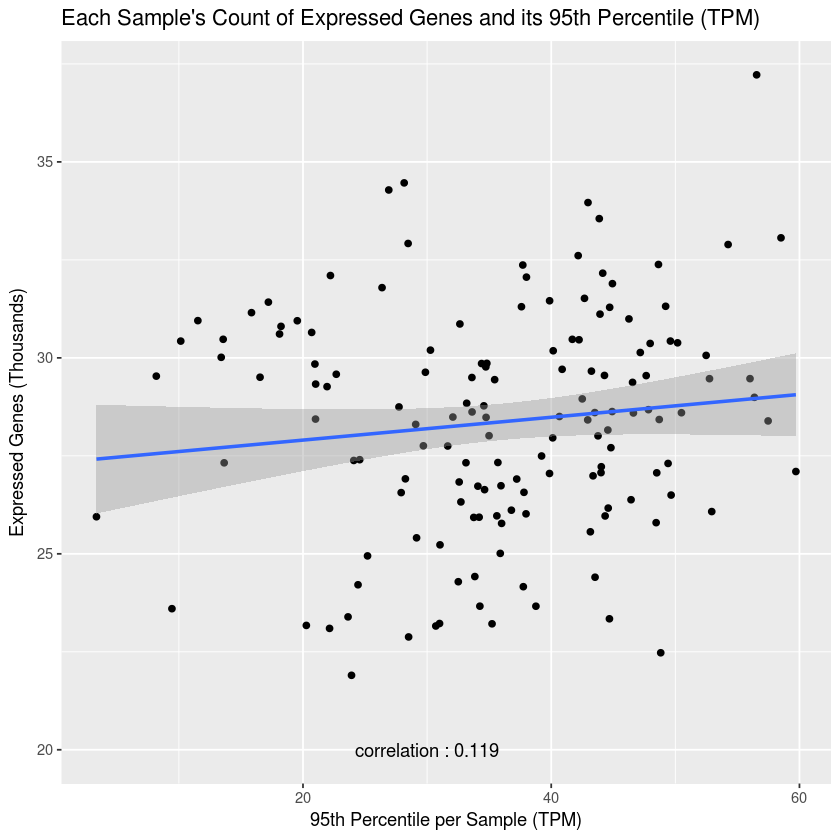

In [67]:

rawTPMDf<-rsemResults

percentileOfEachTPMSampleDf <- rawTPMDf %>%
    group_by(sampleID) %>% 
    summarize(p95 = quantile(TPM, 0.95))

dfNotZerosOrNotZeros <- rawTPMDf %>%
    select(sampleID, TPM) %>%
    group_by(sampleID) %>%
    count(TPM == 0) 

dfNotZeros <- dfNotZerosOrNotZeros %>%
    group_by(sampleID) %>%
    filter(`TPM == 0` == F)


dfNotZeros$p95<-percentileOfEachTPMSampleDf$p95
dfNotZeros$zeroCount <- dfNotZeros$n

dfScatter <- dfNotZeros 
ggplot(dfScatter, aes(p95, zeroCount/1000)) + 
    scale_colour_brewer(type = "seq", palette = "Set1", direction = 1)+
    scale_fill_brewer(type = "seq", palette = "Set1", direction = 1)+
    geom_point() +
    ylab('Expressed Genes (Thousands)') + xlab('95th Percentile per Sample (TPM)') +
    ggtitle('Each Sample\'s Count of Expressed Genes and its 95th Percentile (TPM)') +
    geom_smooth(method = 'lm')+
    annotate(
    "text",
    x = 30,
    y = 20 ,
    label = paste0(
        "correlation : ",
        round(cor(dfScatter$n,dfScatter$p95),3)

    )
    )


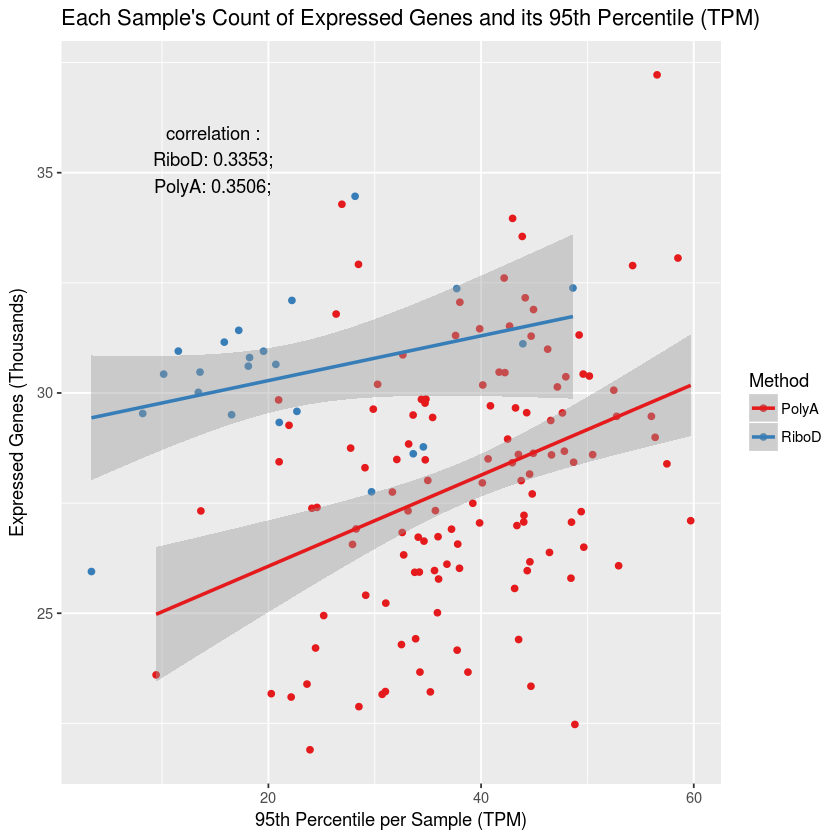

In [70]:
ggplot(dfScatter, aes(p95, zeroCount/1000, color=Method)) + 
	scale_colour_brewer(type = "seq", palette = "Set1", direction = 1)+
	scale_fill_brewer(type = "seq", palette = "Set1", direction = 1)+
	geom_point() +
	ylab('Expressed Genes (Thousands)') + xlab('95th Percentile per Sample (TPM)') +
	ggtitle('Each Sample\'s Count of Expressed Genes and its 95th Percentile (TPM)') +
	geom_smooth(method = 'lm')+
	annotate("text",x = 15,y = 35 ,label = paste0(	"correlation : \n",	resultsCorrelationsM	))





# UMEND vs. Expressed Genes per Sample

 plot # Expressed genes vs UMEND reads per sample;


In [13]:

dfNonZeros <- outlierResults %>%
  select(sampleID, sample) %>%
  group_by(sampleID) %>%
  count(sample == 0) %>%
  filter(`sample == 0` == F)



In [14]:
umendResults <- rename(umendResults, sampleID=th_sampleid)

In [15]:
umendNonZerosDF <- inner_join(dfNonZeros,umendResults, by="sampleID")
umendNonZerosDF<-rename(umendNonZerosDF,rawUMEND=umendCountRaw)

In [ ]:
umendNonZerosDF$method<-gsub("TRUE", "Ribo-depletion(TH01)",umendNonZerosDF$method)


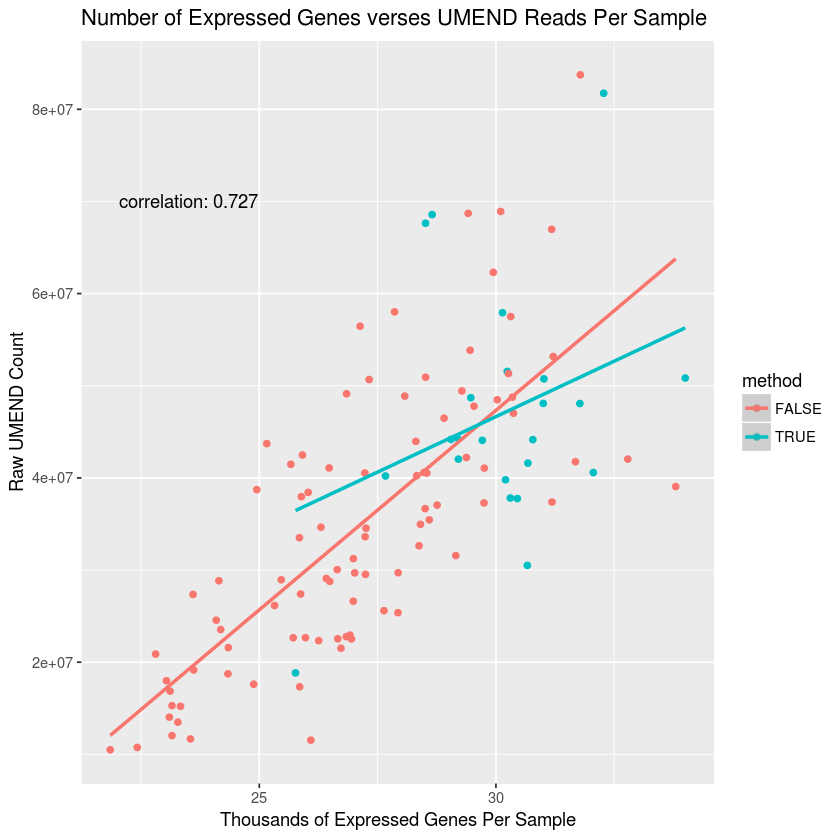

In [17]:
umendNonZerosDF$method <-grepl("TH01",  umendNonZerosDF$sampleID)
ggplot(umendNonZerosDF, aes(n/1000, rawUMEND, color=method)) + geom_point() +
  xlab("Thousands of Expressed Genes Per Sample") + ylab("Raw UMEND Count") +
  geom_smooth(method = 'lm', level = 0) +
  ggtitle("Number of Expressed Genes verses UMEND Reads Per Sample") +
  annotate(
    "text",
    x = 23.5,
    y = 7e+07,
    label = paste0(
      "correlation: ",
      round(cor(umendNonZerosDF$rawUMEND,umendNonZerosDF$n),3)
    )
  )
